In [2]:
library(monocle3)

Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min

Welcome to Bioconductor

    Vignettes contain introductory material; view with


In [3]:
library(Seurat)
library(Matrix)
library(ggplot2)
library(cowplot)
library(dplyr)
library(enrichR)

Registered S3 method overwritten by 'R.oo':
  method        from       
  throw.default R.methodsS3

Attaching package: ‘Seurat’

The following object is masked from ‘package:SummarizedExperiment’:

    Assays


Attaching package: ‘Matrix’

The following object is masked from ‘package:S4Vectors’:

    expand


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************


Attaching package: ‘dplyr’

The following object is masked from ‘package:matrixStats’:

    count

The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union

The following object is masked from ‘package:GenomeInfoDb’:

    intersect

The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union

The following objects are ma

In [4]:
library(schex)

In [5]:
load('N-stomach-fibroblasts.RData')
load('N-stomach-endothelials.RData')
load('N-stomach-macrophages.RData')
load('N-stomach-epithelials.RData')
load('N-stomach-immunes.RData')

In [6]:
load('N-stomach-all.RData')

In [7]:
library(RaceID)

In [8]:
reticulate::import(module='umap')

ERROR: Error in system(paste(which, shQuote(names[i])), intern = TRUE, ignore.stderr = TRUE): cannot popen '/usr/bin/which 'python' 2>/dev/null', probable reason 'Resource temporarily unavailable'


In [10]:
UMAP <- function(data.integrated, dims=1:30){
    data.integrated <- RunPCA(data.integrated, verbose = FALSE)
    data.integrated <- RunUMAP(data.integrated, dims = 1:30, verbose = FALSE, umap.method = 'umap-learn', metric = 'correlation')
    data.integrated <- FindNeighbors(data.integrated, dims = 1:30, verbose = FALSE)
    data.integrated <- FindClusters(data.integrated, verbose = FALSE)
    return (data.integrated)
}

# monocle3 準備

In [11]:
gene_annotation <-
as.data.frame(rownames(epithelials@reductions[['pca']]@feature.loadings), row.names =
                      rownames(epithelials@reductions[['pca']]@feature.loadings))
colnames(gene_annotation) <- 'gene_short_name'

In [12]:
# 不要？
cell_metadata <- as.data.frame(epithelials@assays[['RNA']]@counts@Dimnames[[2]],

rownames = epithelials@assays[['RNA']]@counts@Dimnames[[2]])

colnames(cell_metadata) <- 'barcode'

In [13]:
New_matrix <- epithelials@assays[['RNA']]@counts
New_matrix <- New_matrix[rownames(epithelials@reductions[['pca']]@feature.loadings),]
expression_matrix <- New_matrix

In [14]:
dim(expression_matrix)

[1] 2000 3948

In [15]:
cds_from_seurat <- new_cell_data_set(expression_matrix,
                                    cell_metadata = NULL,
                                    gene_metadata = gene_annotation)

In [16]:
cds <- cds_from_seurat

In [17]:
cds <- preprocess_cds(cds, method = 'PCA',num_dim = 50)

In [18]:
library(reticulate)
# conda_install(packages = 'umap-learn') 

In [18]:
conda_install(packages = 'louvain')

In [19]:
import(module="louvain")

ERROR: Error in py_module_import(module, convert = convert): ModuleNotFoundError: No module named 'louvain'


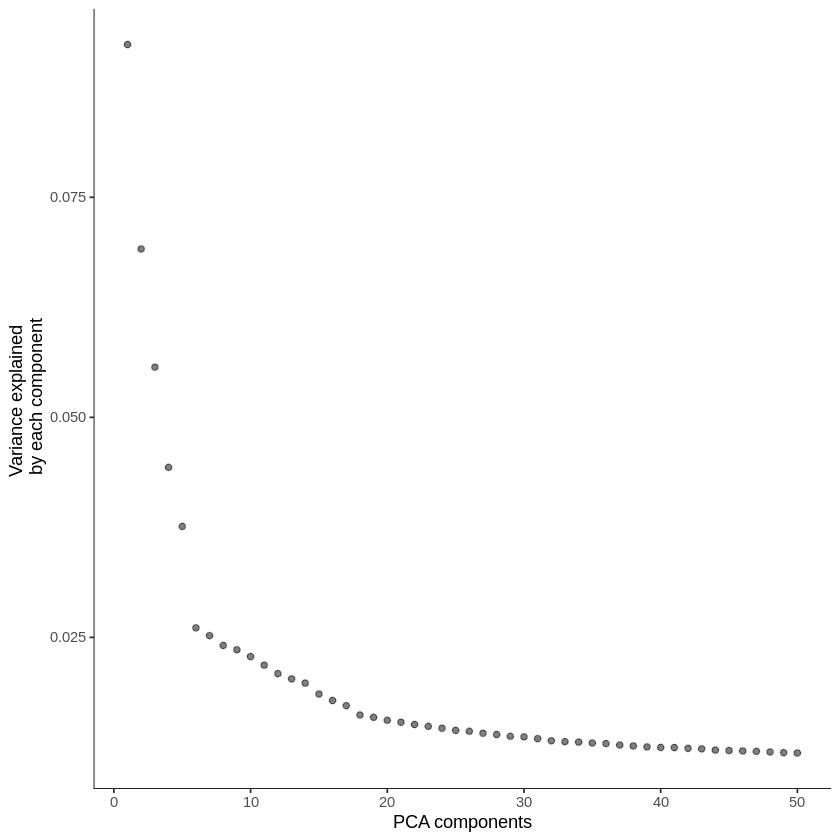

In [19]:
plot_pc_variance_explained(cds)

In [ ]:
cds <- reduce_dimension(cds,reduction_method = 'UMAP')

No preprocess_method specified, using preprocess_method = 'PCA'


# ↑now (12/4 22:00)

In [1]:
plot_cells(cds)

ERROR: Error in plot_cells(cds): could not find function "plot_cells"


In [10]:
importCDS(epithelials)

ERROR: Error in importCDS(epithelials): could not find function "importCDS"


In [11]:
#Extract count data, phenotype data, and feature data from the Seurat Object.
counts.data <- as(as.matrix(epithelials@assays$RNA@data), 'sparseMatrix')
pheno.data <- new('AnnotatedDataFrame', data = epithelials@meta.data)
feature.data <- data.frame(gene_short_name = row.names(counts.data), row.names = row.names(counts.data))
feature.data <- new('AnnotatedDataFrame', data = feature.data)


In [20]:
#Construct a CellDataSet.
cds <- new_cell_data_set(counts.data, cell_metadata = NULL,
                      gene_metadata = feature.data)

ERROR: Error in as.data.frame.default(from, stringsAsFactors = FALSE): cannot coerce class ‘structure("AnnotatedDataFrame", package = "Biobase")’ to a data.frame
